<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/CLUSTERING/ejercicio_model_selection/Ejercicio_how_many_clusters_mpg_Marc_Bonastre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sns

mpg = sns.load_dataset('mpg')

datos originales = (398, 9)
datos sin NaNs = (392, 9)
datos numericos sin NaNs = (392, 7)


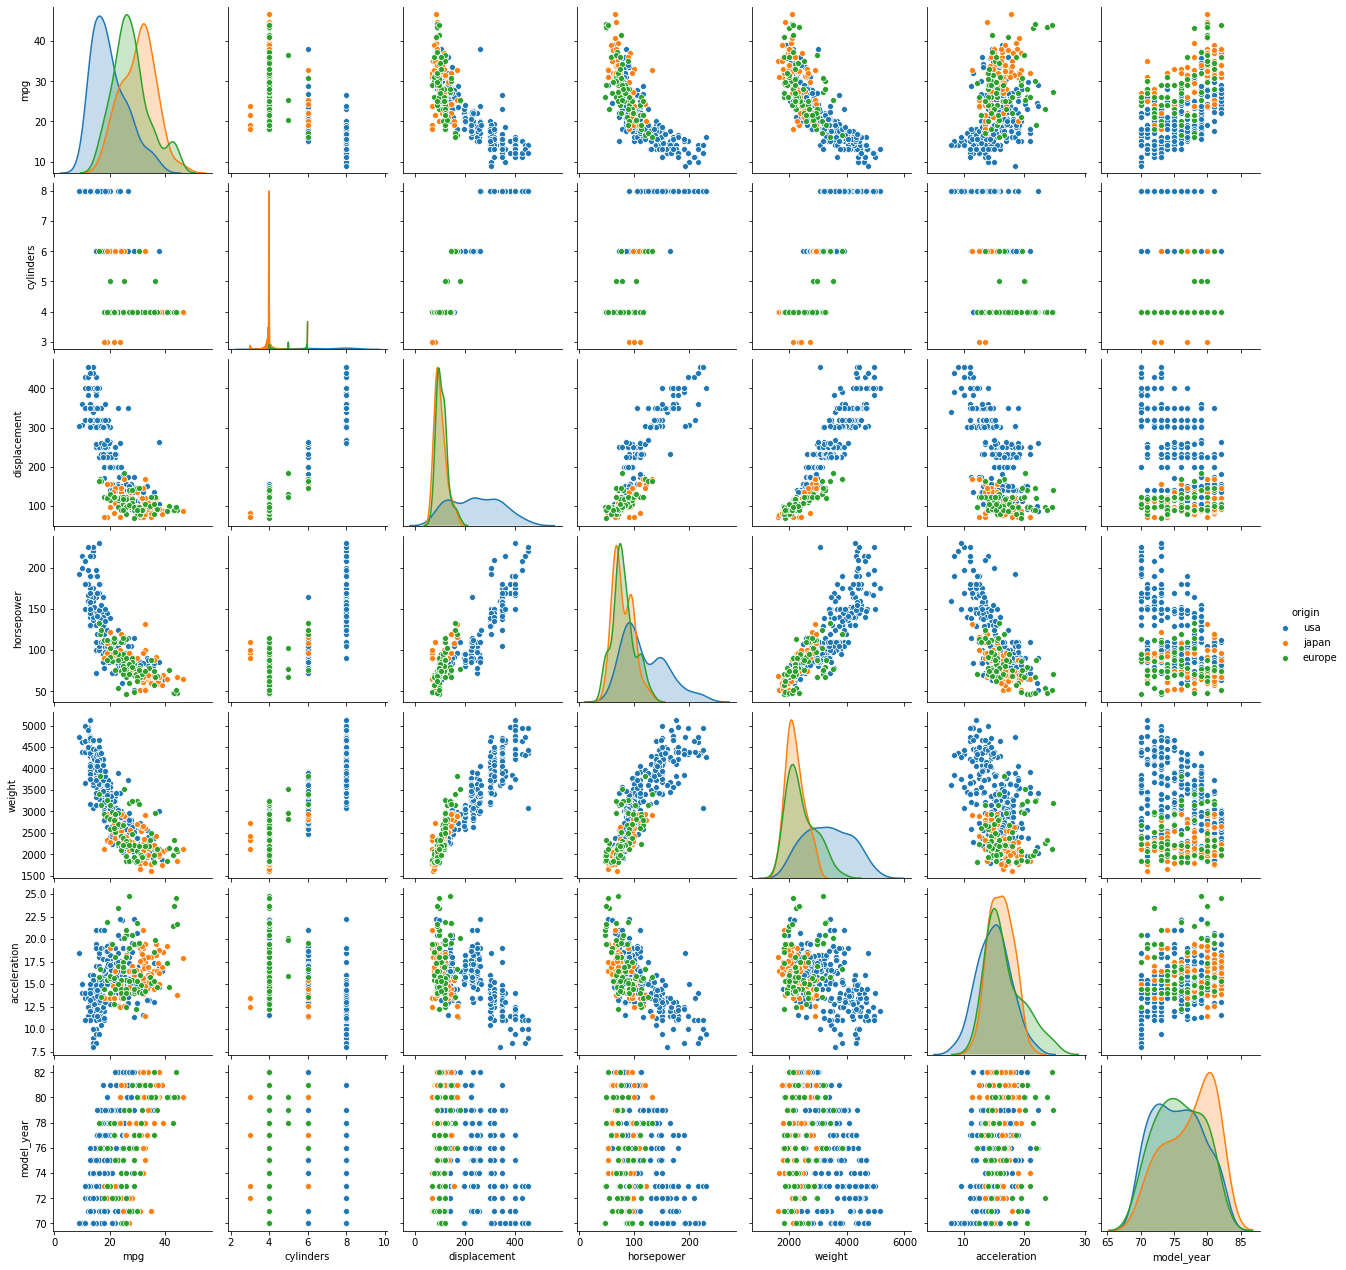

In [7]:
mpg_no_nan = mpg.dropna()
mpg_num = mpg_no_nan.select_dtypes(include='number')


print('datos originales = {}'.format(mpg.shape))
print('datos sin NaNs = {}'.format(mpg_no_nan.shape))
print('datos numericos sin NaNs = {}'.format(mpg_num.shape))

mpg.shape
g = sns.pairplot(mpg, hue="origin")

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import mixture

X = mpg_no_nan[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year']] # features
y = mpg_no_nan['origin'] # class labels

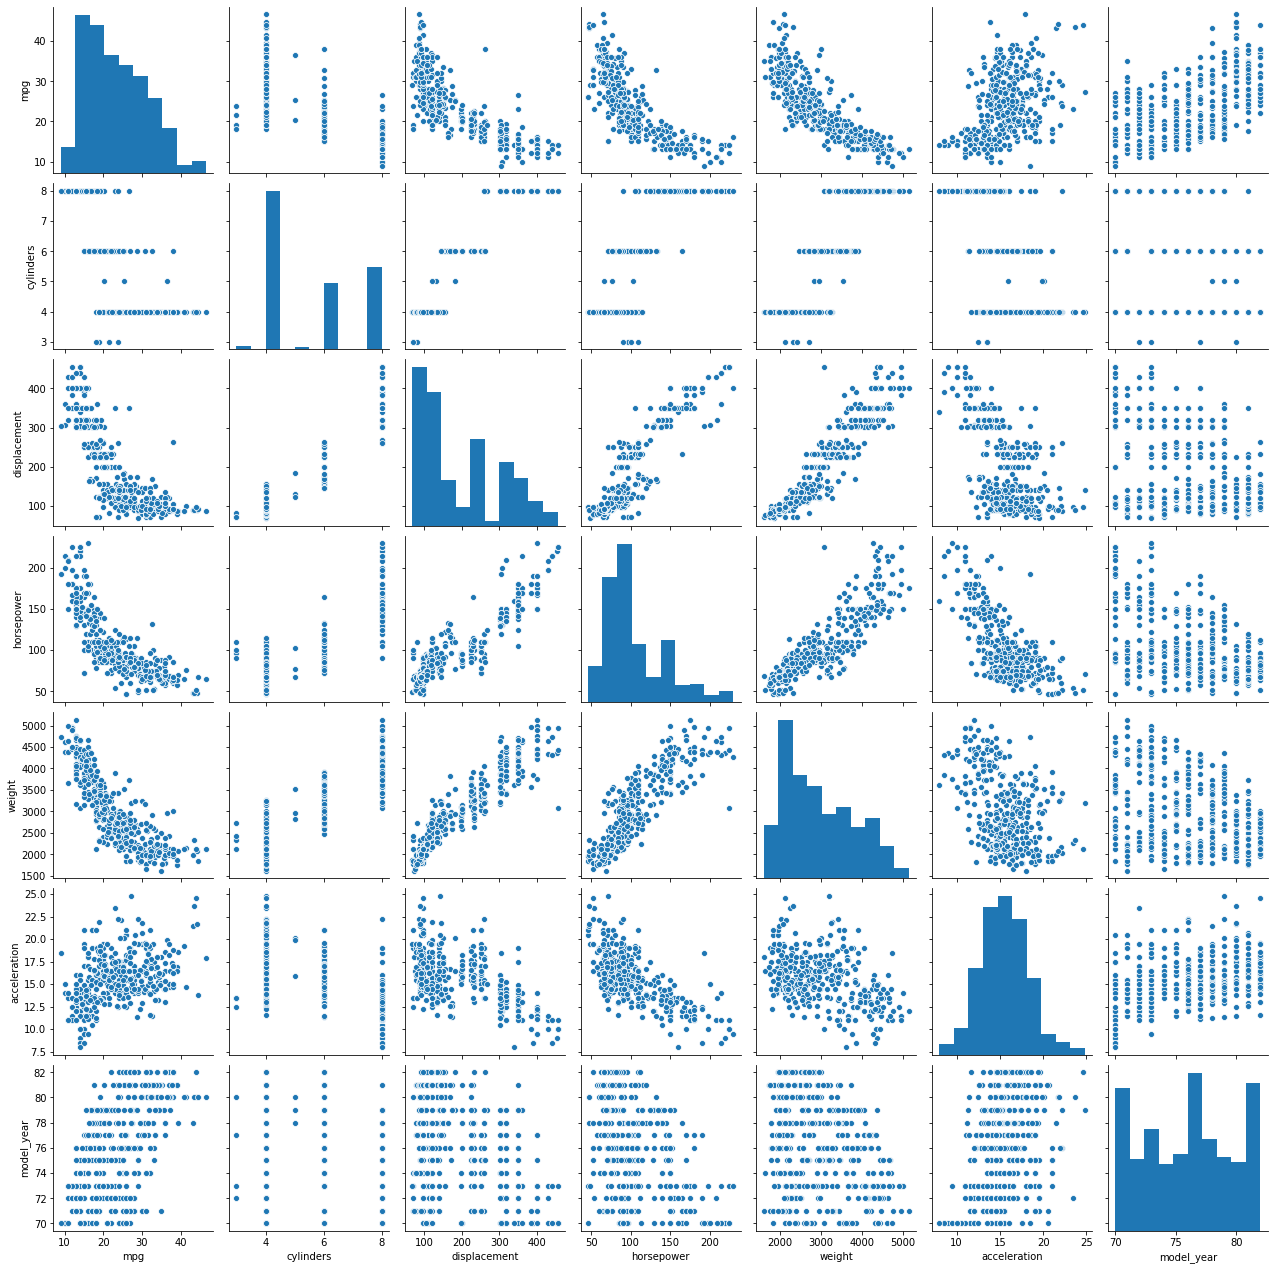

In [14]:
X.shape
g2 = sns.pairplot(X)

In [64]:
NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='tied').fit(X)
    bic.append(gmm.bic(X))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='tied').fit(X)

[21534.51414519508]
[21534.51414519508, 20850.530129154882]
[21534.51414519508, 20850.530129154882, 19967.187330573644]
[21534.51414519508, 20850.530129154882, 19967.187330573644, 19984.577393723874]
[21534.51414519508, 20850.530129154882, 19967.187330573644, 19984.577393723874, 19831.26596432357]
[21534.51414519508, 20850.530129154882, 19967.187330573644, 19984.577393723874, 19831.26596432357, 19667.85294477809]
[21534.51414519508, 20850.530129154882, 19967.187330573644, 19984.577393723874, 19831.26596432357, 19667.85294477809, 19692.189288122874]
[21534.51414519508, 20850.530129154882, 19967.187330573644, 19984.577393723874, 19831.26596432357, 19667.85294477809, 19692.189288122874, 19777.476460655133]
[21534.51414519508, 20850.530129154882, 19967.187330573644, 19984.577393723874, 19831.26596432357, 19667.85294477809, 19692.189288122874, 19777.476460655133, 19746.25043574437]
[21534.51414519508, 20850.530129154882, 19967.187330573644, 19984.577393723874, 19831.26596432357, 19667.85294

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


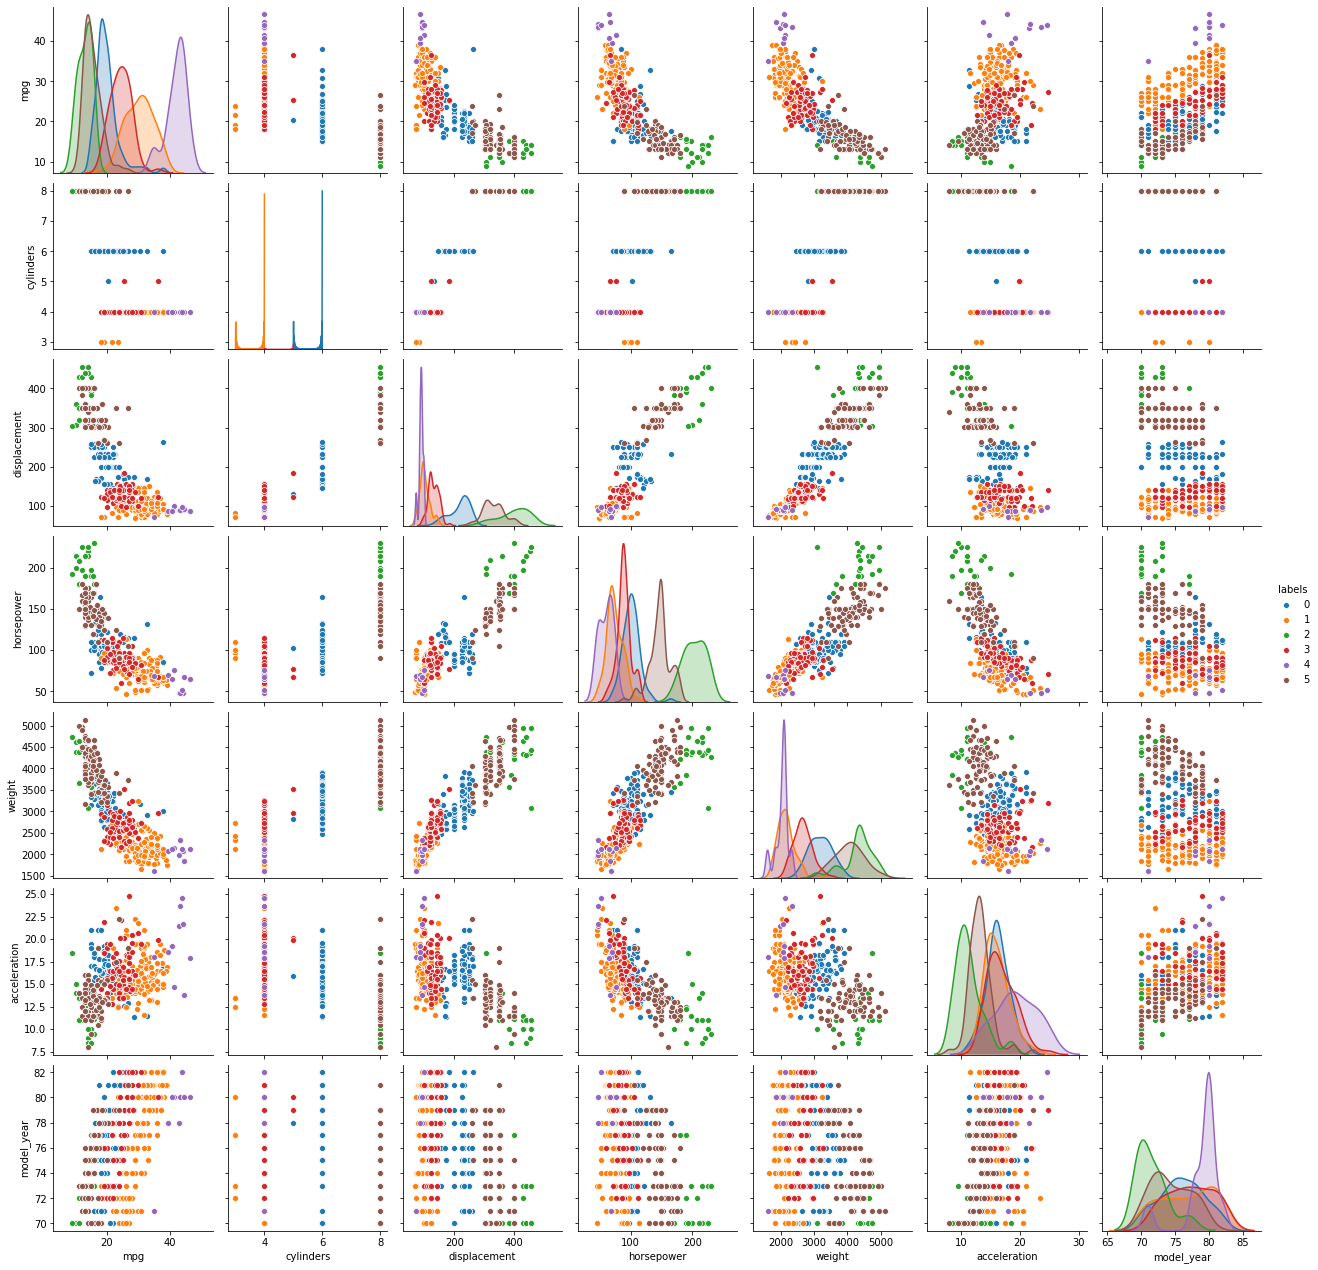

In [66]:
X2 = X
X2['labels']=gmm.predict(X)
g3 = sns.pairplot(X2, hue='labels')